In [4]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
from vosk import Model
from Signal_Analysis.features.signal import get_HNR
from scipy import signal
from audiostretchy.stretch import stretch_audio
import pandas as pd

# tools work in progress
import tools

reload(tools)

plt.style.use("dark_background")
mpl.rcParams["lines.linewidth"] = 0.5
plt.close("all")


## audio, labels, speech recognition

0 i ------------------- from 0.30 to 0.42 sec, confidence: 100.00%
1 skymningen ---------- from 0.42 to 1.26 sec, confidence: 100.00%
2 en ------------------ from 1.35 to 1.50 sec, confidence: 100.00%
3 mycket -------------- from 1.50 to 1.80 sec, confidence: 100.00%
4 het ----------------- from 1.83 to 2.10 sec, confidence: 100.00%
5 dag ----------------- from 2.10 to 2.43 sec, confidence: 100.00%
6 i ------------------- from 2.43 to 2.52 sec, confidence: 100.00%
7 början -------------- from 2.52 to 2.79 sec, confidence: 100.00%
8 av ------------------ from 2.79 to 2.91 sec, confidence: 100.00%
9 juli ---------------- from 2.91 to 3.36 sec, confidence: 100.00%
10 lämnade ------------- from 3.36 to 3.99 sec, confidence: 100.00%
11 en ------------------ from 3.99 to 4.14 sec, confidence: 100.00%
12 ung ----------------- from 4.14 to 4.41 sec, confidence: 100.00%
13 man ----------------- from 4.41 to 4.68 sec, confidence: 100.00%
14 sin ----------------- from 4.68 to 4.92 sec, confidence

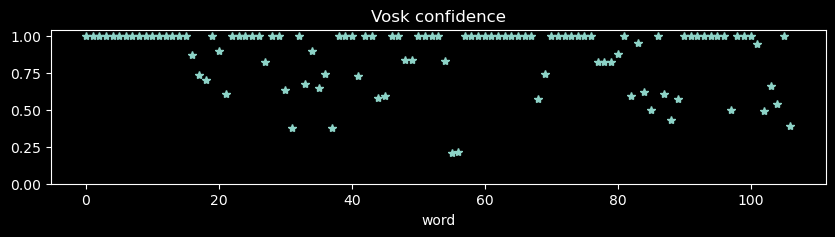

In [8]:
audio_path = "audio_preproc/180923214834-Y20UOTIE-text-000_pp.wav"

Fs, audio = wavfile.read(audio_path)
model_path = "models/vosk-model-small-sv-rhasspy-0.15/"

if "model" not in locals():
    model = Model(model_path)

words = tools.rec_vosk(audio_path, model, print_summary=True)

text = " ".join([w["word"] for w in words])
# get all vowels
for w in words:
    w["vowels"] = tools.checkVowels(w["word"], tools.VOWELS_SV)


print(text)
plt.figure(figsize=(10, 2))
plt.plot([w["conf"] for w in words], "*")
plt.title("Vosk confidence")
plt.xlabel("word")
plt.ylim(bottom=0)
plt.show()


In [9]:
labels_path = (
    "example_speech_Andreas/180923214834-Y20UOTIE-text-000_vowels_timestamp_praat"
)

pd.read_csv(labels_path)


,tmin,tmax
0,0.560813,0.610813
1,0.634599,0.684599
2,0.700651,0.750651
3,0.841320,0.891320
4,0.905731,0.955731
...,...,...
170,42.950020,43.000020
171,43.119169,43.169169
172,43.310235,43.394727
173,43.557646,43.607646
